In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.model_selection import train_test_split


## 1. Download the Dataset and Understand the Format

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
!unzip archive.zip -d images/


Archive:  archive.zip
  inflating: images/README           
  inflating: images/s1/1.pgm         
  inflating: images/s1/10.pgm        
  inflating: images/s1/2.pgm         
  inflating: images/s1/3.pgm         
  inflating: images/s1/4.pgm         
  inflating: images/s1/5.pgm         
  inflating: images/s1/6.pgm         
  inflating: images/s1/7.pgm         
  inflating: images/s1/8.pgm         
  inflating: images/s1/9.pgm         
  inflating: images/s10/1.pgm        
  inflating: images/s10/10.pgm       
  inflating: images/s10/2.pgm        
  inflating: images/s10/3.pgm        
  inflating: images/s10/4.pgm        
  inflating: images/s10/5.pgm        
  inflating: images/s10/6.pgm        
  inflating: images/s10/7.pgm        
  inflating: images/s10/8.pgm        
  inflating: images/s10/9.pgm        
  inflating: images/s11/1.pgm        
  inflating: images/s11/10.pgm       
  inflating: images/s11/2.pgm        
  inflating: images/s11/3.pgm        
  inflating: images/s11/4.pg

In [ ]:
!ls images/s1


10.pgm	1.pgm  2.pgm  3.pgm  4.pgm  5.pgm  6.pgm  7.pgm  8.pgm	9.pgm


##2. Generate the Data Matrix and the Label vector

In [ ]:
directory = 'images/'
image_vectors = []

for folder in os.listdir(directory):
  path = os.path.join(directory, folder)
  if os.path.isdir(path):
    sub_directory = path
    for image in os.listdir(sub_directory):
            f = os.path.join(sub_directory, image)
            # The function imread loads an image from the specified file and returns it
            img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
            vector = np.array(img)
            result = vector.flatten()
            image_vectors.append(result)
image_vectors = np.array(image_vectors)
image_vectors.shape       

(400, 10304)

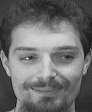

In [ ]:
cv2_imshow(img)

In [ ]:
labels = []

for i in range (1,41):
    for j in range (0,10):
        labels.append(i)

labels = np.array(labels)
labels    

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23,
       23, 23, 23, 23, 23

## 3. Split the Dataset into Training and Test sets

We used a random number generator with a set seed so we can always have the same split.

In [ ]:
def split_train_test(train_percentage, data, labels):
  test_percentage = 100-train_percentage
  number_of_data = data.shape[0]  
  random.seed(2)

  train_split_size = (number_of_data * train_percentage) // 100 
  test_split_size = number_of_data - train_split_size


  list1 = range(number_of_data)
  list11 = np.arange(number_of_data)

  train_indices = random.sample(list1, train_split_size)
  test_indices = np.delete(list11, train_indices)


  train_data = np.zeros( (train_split_size, data.shape[1]) )
  test_data = np.zeros( (test_split_size, data.shape[1] ) ) 
  train_labels = np.zeros( (train_split_size, ) )
  test_labels = np.zeros( (test_split_size, ) )

  for index1, index2 in enumerate(train_indices) :
    train_data[index1] = data[index2]
    train_labels[index1] = int(labels[index2])
                
  for index1, index2 in enumerate(test_indices):
    test_data[index1] = data[index2]
    test_labels[index1] = int(labels[index2])


  return train_data, test_data, train_labels, test_labels 


  


    




In [ ]:
train_data, test_data, train_labels, test_labels = split_train_test(70, image_vectors,labels)
print(train_labels)

[ 3.  5.  5. 19.  9. 38. 35. 16. 13. 32. 11. 40.  2. 30. 35.  9. 23. 33.
 21. 38. 27. 20. 28. 23. 26. 14. 39.  2. 19. 24. 17. 20. 22. 27.  9. 29.
 10. 13. 12.  2. 37. 17.  9.  7. 27. 36. 40. 27. 35. 37. 10. 23. 22. 27.
 38. 31. 19. 19. 39.  9. 21. 24. 34. 28. 13. 26. 15. 26. 26. 36. 35. 24.
 34. 18. 30. 29. 24. 25. 12. 36.  9. 32. 38. 25. 16. 16. 26. 29. 27. 26.
 31. 21. 16. 11. 34. 27. 19.  4. 18.  1. 10.  6.  4. 30.  3. 14. 12. 30.
 27. 36. 14. 13. 11. 39. 37.  2.  3. 40. 36. 36. 34. 37.  5.  6.  4. 38.
  3.  2. 20. 14.  7.  9. 10.  1. 20.  3. 13.  8. 38.  1. 18.  6. 15. 18.
 31.  1.  8. 12. 15. 20. 16. 19.  2. 24.  7. 20. 11. 39. 31. 19.  4. 13.
 32.  3. 17. 18. 35. 22.  3.  1. 26. 39. 23.  4. 14. 15. 20. 11. 13. 14.
  9.  4.  9.  7. 32. 32. 32. 17. 31. 39. 34.  4. 18. 38.  7.  1.  4.  5.
 40.  3. 30. 17.  6. 28. 33. 34.  7. 32. 19. 33. 36. 21. 28. 16. 28. 25.
 29. 20. 10. 37. 24. 39.  8. 14.  1. 31.  1. 10. 11. 21. 40. 25. 27.  7.
 24. 30.  1. 40. 20. 17.  6. 25. 14. 37. 40.  8. 32

## 4. Classification using PCA

In [ ]:
alphaaa = np.array([0.8,0.85,0.9,0.95])

Compute mean

In [ ]:
train_data_mean = np.mean(train_data,axis=0)
print(train_data_mean)

[83.73571429 83.81071429 84.25       ... 75.57857143 74.80714286
 73.62142857]


In [ ]:
train_data_mean.shape

(10304,)

Centering data matrix

In [ ]:
Centered_Train_Data_Matrix = train_data - np.transpose(train_data_mean)
print(Centered_Train_Data_Matrix)
print(Centered_Train_Data_Matrix.shape)

[[ 35.26428571  36.18928571  35.75       ...  13.42142857  19.19285714
   11.37857143]
 [ 13.26428571  10.18928571   7.75       ...  68.42142857  68.19285714
   55.37857143]
 [ -0.73571429   2.18928571  -0.25       ...  60.42142857  63.19285714
   60.37857143]
 ...
 [ 19.26428571  20.18928571  20.75       ...   0.42142857   1.19285714
    1.37857143]
 [-11.73571429 -10.81071429  -7.25       ...  24.42142857  11.19285714
    2.37857143]
 [-55.73571429 -58.81071429 -57.25       ... 111.42142857 112.19285714
  116.37857143]]
(280, 10304)


Compute covariance matrix

In [ ]:
Train_Covariance_Matrix = np.dot(np.transpose(Centered_Train_Data_Matrix),Centered_Train_Data_Matrix)/Centered_Train_Data_Matrix.shape[0]
print(Train_Covariance_Matrix)

[[1343.83729592 1331.48568878 1327.15535714 ... -187.43280612
  -162.85096939  -79.55362245]
 [1331.48568878 1335.06774235 1324.27946429 ... -177.80834184
  -154.6365051   -74.81451531]
 [1327.15535714 1324.27946429 1331.57321429 ... -175.16607143
  -148.47321429  -71.50892857]
 ...
 [-187.43280612 -177.80834184 -175.16607143 ... 2271.85811224
  2008.51515306 1765.74045918]
 [-162.85096939 -154.6365051  -148.47321429 ... 2008.51515306
  2030.63423469 1841.75913265]
 [ -79.55362245  -74.81451531  -71.50892857 ... 1765.74045918
  1841.75913265 1920.62811224]]


Asserting that our calculation of the covariance matrix is correct

In [ ]:
cov_mat = np.cov(np.transpose(train_data), bias=True)
print(cov_mat)
print(cov_mat.shape)
print(Train_Covariance_Matrix.shape)

[[1343.83729592 1331.48568878 1327.15535714 ... -187.43280612
  -162.85096939  -79.55362245]
 [1331.48568878 1335.06774235 1324.27946429 ... -177.80834184
  -154.6365051   -74.81451531]
 [1327.15535714 1324.27946429 1331.57321429 ... -175.16607143
  -148.47321429  -71.50892857]
 ...
 [-187.43280612 -177.80834184 -175.16607143 ... 2271.85811224
  2008.51515306 1765.74045918]
 [-162.85096939 -154.6365051  -148.47321429 ... 2008.51515306
  2030.63423469 1841.75913265]
 [ -79.55362245  -74.81451531  -71.50892857 ... 1765.74045918
  1841.75913265 1920.62811224]]
(10304, 10304)
(10304, 10304)


In [ ]:
try:
  np.testing.assert_array_equal(cov_mat, Train_Covariance_Matrix)
except AssertionError as e:
  print(e)


Arrays are not equal

Mismatched elements: 21524996 / 106172416 (20.3%)
Max absolute difference: 4.54747351e-13
Max relative difference: 2.22044605e-16
 x: array([[1343.837296, 1331.485689, 1327.155357, ..., -187.432806,
        -162.850969,  -79.553622],
       [1331.485689, 1335.067742, 1324.279464, ..., -177.808342,...
 y: array([[1343.837296, 1331.485689, 1327.155357, ..., -187.432806,
        -162.850969,  -79.553622],
       [1331.485689, 1335.067742, 1324.279464, ..., -177.808342,...


The difference is within acceptable range

Compute eigenvalues and eigenvectors

In [ ]:
train_eigen_vals, train_eigen_vecs = LA.eigh(Train_Covariance_Matrix)
idx = train_eigen_vals.argsort()[::-1]   
train_eigen_vals = train_eigen_vals[idx]
train_eigen_vecs = train_eigen_vecs[:,idx]
print(train_eigen_vals)
print(train_eigen_vecs)

[ 2.72286968e+06  2.20750326e+06  1.13898868e+06 ... -1.17174915e-09
 -1.72432382e-09 -1.75139081e-09]
[[ 0.0037122  -0.01476915 -0.02046483 ...  0.          0.
   0.        ]
 [ 0.00367362 -0.0147245  -0.0204496  ... -0.07383385  0.36807271
   0.33130376]
 [ 0.00366895 -0.014701   -0.02050773 ... -0.33440161 -0.2813665
  -0.20421921]
 ...
 [ 0.00638864  0.01048788 -0.01195504 ...  0.0153833   0.00037995
  -0.01709879]
 [ 0.00651046  0.01003697 -0.01186481 ... -0.00707523 -0.00171888
   0.02504252]
 [ 0.00717956  0.0085864  -0.01226095 ...  0.02767162  0.00308461
  -0.00457921]]


Covariance matrix is symmetric, so the eigenvalues should be real numbers. When using the function eig() instead of eigh(), by default the returned value is complex. The imaginary part is due to numeric error so we should discard it. But since the matrix is symmetric we simply used eigh() which is optimized for symmetric matrices specifically and thus faster.

In [ ]:
#train_eigen_vals = train_eigen_vals.real
#train_eigen_vecs = train_eigen_vecs.real

Fraction of total variance

In [ ]:
train_eigen_values_total = np.sum(train_eigen_vals)
"""
train_eigen_vals = np.flip(train_eigen_vals)
train_eigen_vecs = np.flip(train_eigen_vecs,axis=1)
print(train_eigen_vals)
print(train_eigen_vecs)
"""
print("\nSum of  Eigen Values= ",train_eigen_values_total,"\n")
num_of_dim = np.empty(len(alphaaa),)
k = 0
for alpha in alphaaa:
  sum = 0
  r = 0
  while sum < alpha * train_eigen_values_total:
        sum += train_eigen_vals[r]
        r += 1
  num_of_dim[k] = r
  print("Explained variance for alpha = " + str(alpha) + " is " + str(num_of_dim[k]) + " dimensions")
  k += 1



Sum of  Eigen Values=  16227364.03187499 

Explained variance for alpha = 0.8 is 40.0 dimensions
Explained variance for alpha = 0.85 is 59.0 dimensions
Explained variance for alpha = 0.9 is 92.0 dimensions
Explained variance for alpha = 0.95 is 149.0 dimensions


Getting Reduced Dimentionality Matrix

In [ ]:
def get_reduced_dim_mat(dimensions, matrix):
  projection_matrix_r = np.delete(train_eigen_vecs, np.s_[int(dimensions) : train_eigen_vecs.shape[1]], axis=1)
  reduced_dim_mat = np.dot(np.transpose(projection_matrix_r),np.transpose(matrix)) 
  reduced_dim_mat = np.transpose(reduced_dim_mat)

  return reduced_dim_mat

In [ ]:
def KNNclf(neighbours, X_train, y_train, X_test, y_test):
  clf = KNeighborsClassifier(n_neighbors=neighbours)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy: ", accuracy)
  #print(confusion_matrix(y_test, y_pred))
  #print(classification_report(y_test, y_pred))
  return accuracy

In [ ]:
k_neighbours = [1, 3, 5, 7]
accuracies = np.empty((len(alphaaa), len(k_neighbours)))
print(accuracies.shape)
for i, dim in enumerate(num_of_dim):
  X_train = get_reduced_dim_mat(dim, train_data - np.transpose(train_data_mean))
  X_test = get_reduced_dim_mat(dim, test_data - np.transpose(train_data_mean))
  y_train = train_labels
  y_test = test_labels
  for j, k in enumerate(k_neighbours):
    print(str(int(dim)) + " dimensions with " + str(k) + " nearest neighbours")
    accuracy = KNNclf(k, X_train, y_train, X_test, y_test)
    accuracies[i][j] = accuracy
accuracies = np.transpose(accuracies)


(4, 4)
40 dimensions with 1 nearest neighbours
Accuracy:  0.8916666666666667
40 dimensions with 3 nearest neighbours
Accuracy:  0.8666666666666667
40 dimensions with 5 nearest neighbours
Accuracy:  0.8083333333333333
40 dimensions with 7 nearest neighbours
Accuracy:  0.7333333333333333
59 dimensions with 1 nearest neighbours
Accuracy:  0.9083333333333333
59 dimensions with 3 nearest neighbours
Accuracy:  0.8666666666666667
59 dimensions with 5 nearest neighbours
Accuracy:  0.8166666666666667
59 dimensions with 7 nearest neighbours
Accuracy:  0.7083333333333334
92 dimensions with 1 nearest neighbours
Accuracy:  0.9083333333333333
92 dimensions with 3 nearest neighbours
Accuracy:  0.875
92 dimensions with 5 nearest neighbours
Accuracy:  0.7916666666666666
92 dimensions with 7 nearest neighbours
Accuracy:  0.7083333333333334
149 dimensions with 1 nearest neighbours
Accuracy:  0.9083333333333333
149 dimensions with 3 nearest neighbours
Accuracy:  0.875
149 dimensions with 5 nearest neighbo

We tried to project with the data before centering and after centering. As long as we centered both the train data and test data, we got the same results.

plotting different alpha values against accuracy for different k values for the KNN classifier

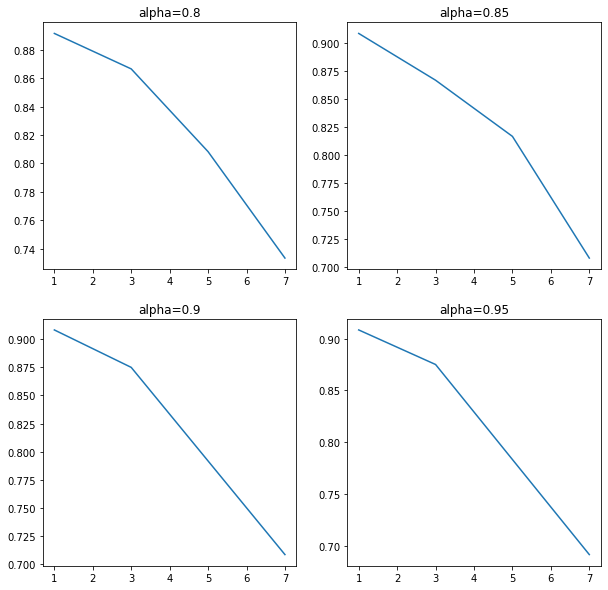

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(len(alphaaa)):
  plt.subplot(2, 2, i+1)
  plt.title("alpha=" + str(alphaaa[i]))
  plt.plot(k_neighbours, accuracies.T[i])

[0.8  0.85 0.9  0.95]
[[0.89166667 0.90833333 0.90833333 0.90833333]
 [0.86666667 0.86666667 0.875      0.875     ]
 [0.80833333 0.81666667 0.79166667 0.78333333]
 [0.73333333 0.70833333 0.70833333 0.69166667]]


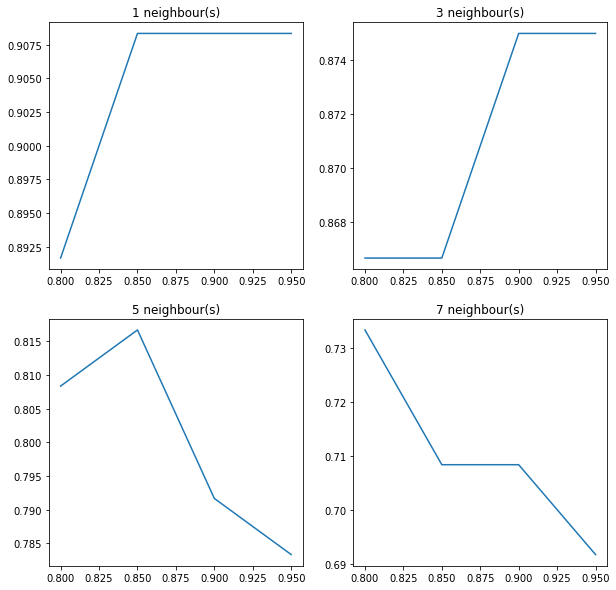

In [ ]:
print(alphaaa)
print(accuracies)
plt.figure(figsize=(10, 10))

for i in range(len(k_neighbours)):
  plt.subplot(2, 2, i+1)
  plt.title(str(k_neighbours[i]) + " neighbour(s)")
  plt.plot(alphaaa, accuracies[i])


## 5. Classification Using LDA

In [ ]:
n = 7
m = 3
LDA_mean = np.zeros((40,train_data.shape[1]))
for i in range(0,train_data.shape[0], n):
    #print(i//5,"\t",i,"\t",i+5)
    LDA_mean[i//n] = np.mean(train_data[i:i+n,:], axis=0)
#print(LDA_mean)
#print("\n Dimensions:",LDA_mean.shape)
B = np.empty((10304,10304))
data_mean = train_data_mean.reshape(1, train_data.shape[1])
for i, mean_vec in enumerate(LDA_mean):

  mean_vec = mean_vec.reshape(1, train_data.shape[1])
  mu1_mu2 = mean_vec - data_mean
  B += n * np.dot(mu1_mu2.T, mu1_mu2)
print(B)
#print("\n Dimensions:", B.shape)

[[ 60298.73228363  59686.56795933  59452.07509752 ... -26666.32218279
  -22440.40777525 -17666.29282044]
 [ 59686.54951656  59517.52456121  59053.80672757 ... -25529.61094069
  -21777.78282017 -17444.05569932]
 [ 59452.05096375  59053.80097897  59246.47949227 ... -25977.36909789
  -20858.65472196 -15871.79797524]
 ...
 [-26666.34567022 -25529.62104862 -25977.34175956 ...  74991.11661639
   61415.25334503  44943.90638864]
 [-22440.38924319 -21777.79457602 -20858.64993237 ...  61415.23099233
   60542.16717983  48811.70651046]
 [-17666.30457921 -17444.06120111 -15871.75804267 ...  44943.88773905
   48811.7085864   51592.4500367 ]]


In [ ]:
LDA_Centered_Data_Matrix = np.zeros((train_data.shape[0],train_data.shape[1]))

for i in range(0,train_data.shape[0],1):
  LDA_Centered_Data_Matrix[i,:] = train_data[i,:] - LDA_mean[i//n,:]
  
print(LDA_Centered_Data_Matrix)   
print(LDA_Centered_Data_Matrix.shape)

LDA_Centered_Data_Matrix40 = np.empty((40, n, 10304))
for i in range(0, train_data.shape[0], n):
   print(i//n,"\t",i,"\t",i+n)
   LDA_Centered_Data_Matrix40[i//n] = LDA_Centered_Data_Matrix[i:i+n,:]

print("Center Class matrices: \n",LDA_Centered_Data_Matrix40,"\n") 
S = np.empty((10304,10304))
for i in range(0,40,1):
  S += np.dot(np.transpose(LDA_Centered_Data_Matrix40[i]),LDA_Centered_Data_Matrix40[i])

print(S)
print("\nS dims:",S.shape)

[[ 45.71428571  46.28571429  46.         ...   0.57142857   4.85714286
    5.14285714]
 [ 23.71428571  20.28571429  18.         ...  55.57142857  53.85714286
   49.14285714]
 [  9.71428571  12.28571429  10.         ...  47.57142857  48.85714286
   54.14285714]
 ...
 [ 41.28571429  42.57142857  42.71428571 ...   1.85714286   2.57142857
    3.85714286]
 [ 10.28571429  11.57142857  14.71428571 ...  25.85714286  12.57142857
    4.85714286]
 [-33.71428571 -36.42857143 -35.28571429 ... 112.85714286 113.57142857
  118.85714286]]
(280, 10304)
0 	 0 	 7
1 	 7 	 14
2 	 14 	 21
3 	 21 	 28
4 	 28 	 35
5 	 35 	 42
6 	 42 	 49
7 	 49 	 56
8 	 56 	 63
9 	 63 	 70
10 	 70 	 77
11 	 77 	 84
12 	 84 	 91
13 	 91 	 98
14 	 98 	 105
15 	 105 	 112
16 	 112 	 119
17 	 119 	 126
18 	 126 	 133
19 	 133 	 140
20 	 140 	 147
21 	 147 	 154
22 	 154 	 161
23 	 161 	 168
24 	 168 	 175
25 	 175 	 182
26 	 182 	 189
27 	 189 	 196
28 	 196 	 203
29 	 203 	 210
30 	 210 	 217
31 	 217 	 224
32 	 224 	 231
33 	 2

In [ ]:
S_inv=np.linalg.inv(S)
print(S_inv.shape)
print("\n",S_inv)

(10304, 10304)

 [[-1.60056798e+08  7.85304176e+08 -5.76323567e+08 ... -5.26535239e+00
   1.08119864e+00  3.90939650e+00]
 [ 1.31332768e+09  4.65377475e+08  6.75851330e+08 ... -9.49390840e+00
   1.24553542e+01  5.15243299e+00]
 [ 8.22152974e+08  9.42141892e+08 -2.01404584e+08 ...  6.36782876e+00
  -8.24456824e+00 -6.63835462e+00]
 ...
 [ 1.83165601e+08 -6.36586749e+06 -1.12450909e+08 ...  8.13028775e-01
  -3.83845739e-01 -4.11892660e-01]
 [-1.11078356e+08 -2.43386383e+07  5.40901826e+07 ... -7.46492288e-01
   1.36289361e-01  4.43986327e-01]
 [ 2.98384256e+08  1.30765043e+08 -9.06900204e+06 ... -5.33202395e-01
   6.99215365e-01  1.51329147e+00]]


In [ ]:
SB = np.dot(S_inv,B)

In [ ]:
S_eigenvals, S_eigenvecs = LA.eigh(SB)

In [ ]:
idx = S_eigenvals.argsort()[::-1]   
S_eigenvals = S_eigenvals[idx].real
S_eigenvecs = S_eigenvecs[:,idx].real
print(S_eigenvals)
print(S_eigenvals.shape)
print(S_eigenvecs)
print(S_eigenvecs.shape)


[ 1.23814829e+18  8.39587636e+17  5.09143536e+17 ... -5.12664070e+17
 -8.40100939e+17 -1.22846209e+18]
(10304,)
[[ 0.01546645 -0.01532329  0.00107502 ... -0.00067285  0.01542198
  -0.01566157]
 [ 0.01519905 -0.01490355  0.00154007 ... -0.00113982  0.01500154
  -0.01539516]
 [ 0.01507211 -0.01536317  0.00160428 ... -0.00119117  0.01561984
  -0.01536788]
 ...
 [-0.0008092   0.00159349  0.00136606 ...  0.00135391  0.00165004
  -0.00080553]
 [ 0.00120944 -0.00237716 -0.00254821 ... -0.00254566 -0.00241795
   0.00119298]
 [ 0.00061009 -0.00075608 -0.00087022 ... -0.00087038 -0.00079486
   0.00061657]]
(10304, 10304)


In [ ]:
projection_matrix = S_eigenvecs[:,0:39]
print(projection_matrix)
print(projection_matrix.shape)

[[ 0.01546645 -0.01532329  0.00107502 ... -0.00527558  0.0084604
  -0.00235456]
 [ 0.01519905 -0.01490355  0.00154007 ... -0.00439124  0.00998622
  -0.0027463 ]
 [ 0.01507211 -0.01536317  0.00160428 ... -0.00578172  0.00860771
  -0.00264924]
 ...
 [-0.0008092   0.00159349  0.00136606 ...  0.00118761  0.0001376
  -0.00040163]
 [ 0.00120944 -0.00237716 -0.00254821 ...  0.00248414  0.00146296
  -0.00190362]
 [ 0.00061009 -0.00075608 -0.00087022 ... -0.00225601 -0.00045022
  -0.00082102]]
(10304, 39)


In [ ]:
test_LDA =np.dot(np.transpose(projection_matrix),np.transpose(test_data))
test_LDA = np.transpose(test_LDA)
print("Reduced Data Matrix\n",test_LDA)
print("Reduced Data Matrix Dimensions\n",test_LDA.shape)
train_LDA=np.dot(np.transpose(projection_matrix),np.transpose(train_data))
train_LDA = np.transpose(train_LDA)

Reduced Data Matrix
 [[4767.11445797 2835.86680959 2691.44538574 ...   95.05042948
    80.42716632 -684.47535461]
 [3839.84953207 2186.32312804 1991.38530969 ...  234.1959398
  -146.57990062 -345.60858354]
 [4780.00560332 1397.03003451 1893.91715944 ...   77.15769502
  -168.08065498 -550.63019572]
 ...
 [4243.26434218  783.19235934 2211.19019321 ...  243.96283753
   116.87092469 -659.40389265]
 [4325.8172513  1543.64251529 2949.74299173 ...   50.52993494
  -264.90308997 -390.64038372]
 [4577.31379607 2090.44739121 2885.29474397 ...  209.66731442
    43.75087214 -385.91458901]]
Reduced Data Matrix Dimensions
 (120, 39)


In [ ]:
X_train = train_LDA
X_test = test_LDA
y_train=train_labels
y_test=test_labels
print("Train Data Dimensions:",train_LDA.shape)
print("Test Data Dimensions:",test_LDA.shape)


Train Data Dimensions: (280, 39)
Test Data Dimensions: (120, 39)


In [ ]:
k_neighbours = [1, 3, 5, 7]
accuracies_LDA = np.empty( (len(k_neighbours),))



for i, k in enumerate(k_neighbours):
  print(str(k) + " nearest neighbours")
  accuracy = KNNclf(k, X_train, y_train, X_test, y_test)
  accuracies_LDA[i] = accuracy


accuracies_LDA = np.transpose(accuracies_LDA)
accuracies_LDA

1 nearest neighbours
Accuracy:  0.825
3 nearest neighbours
Accuracy:  0.8
5 nearest neighbours
Accuracy:  0.7583333333333333
7 nearest neighbours
Accuracy:  0.675


array([0.825     , 0.8       , 0.75833333, 0.675     ])

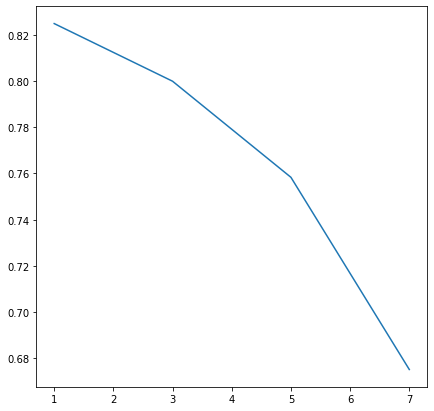

In [ ]:
plt.figure(figsize=(7, 7))

plt.plot(k_neighbours, accuracies_LDA)

